# Predicting heart disease using ML

This notebook looks into using various Python based ml and data science libraries in an attempt to build a ml model capable of predicting whether or not someone has heart disease based on their medical attributes

we are going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation
   

### 1. Problem Definition
In a statement,
> given clinical data about a pateint can we predict whether or not they have heart disease?

### 2. Data & 4. features
# create a data dictionary
The original data came from the cleveland data from the UCI ml repo
* age (Age of the patient in years)
* sex (Male/Female)
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* target: 1 or 0

## 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a pateint has heart disease during th proof of concept, we'll prepare the project

## preparing the tools
we are going to use pandas, matplotlib, and numpy for data analysis and manipulation

In [1]:
#import all the tools we need
#Regular EDA(explanatory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#because we want our plots to appear inside the notebook
#models from sk learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#model evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score,roc_curve,auc,RocCurveDisplay

In [2]:
df=pd.read_csv("6.1 heart-disease.csv")

In [3]:
df.shape

(303, 14)

## data exploration (EDA)
the goal here is to find out more about the data and become a subject matter expert on the dataset you are working with
1. What question are you trying to solve?
2. what kind of data do we have and how do we treat different types?
3. whats missing from the data and how do you deal with it?
4. where are the outliers and why should you care about them?
5. How can you add, change and remove features to get more out of your data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
#lets find out how many of each class there 
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

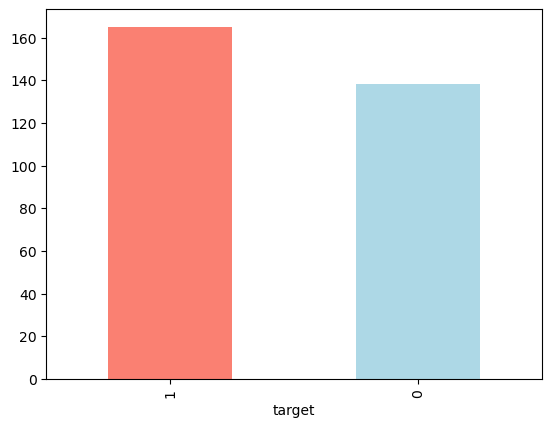

In [7]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
#are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
#heart disease frequency to sex

In [12]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [13]:
# compare target to sex
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


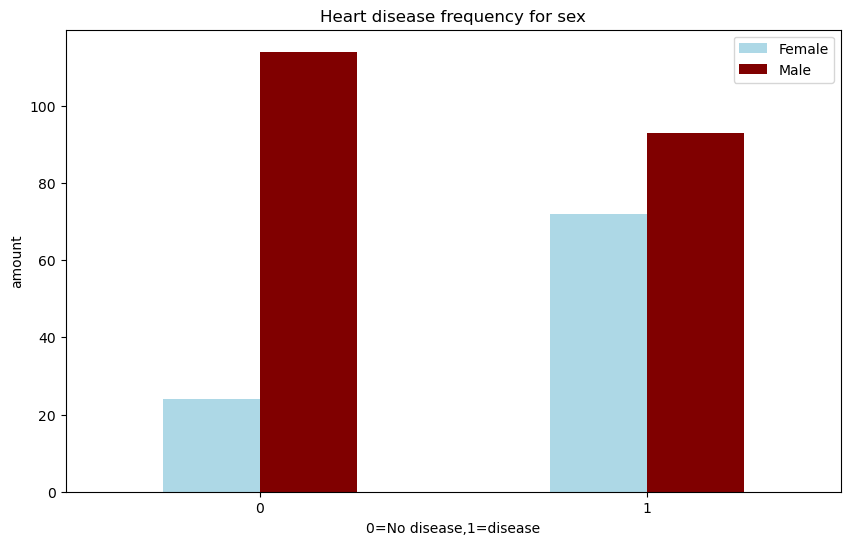

In [14]:
# create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["lightblue","maroon"])
plt.title("Heart disease frequency for sex")
plt.xlabel("0=No disease,1=disease")
plt.ylabel("amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

In [15]:
df["thalach"].value_counts

<bound method IndexOpsMixin.value_counts of 0      150
1      187
2      172
3      178
4      163
      ... 
298    123
299    132
300    141
301    115
302    174
Name: thalach, Length: 303, dtype: int64>

### Age vs Max heart rate for heart disease

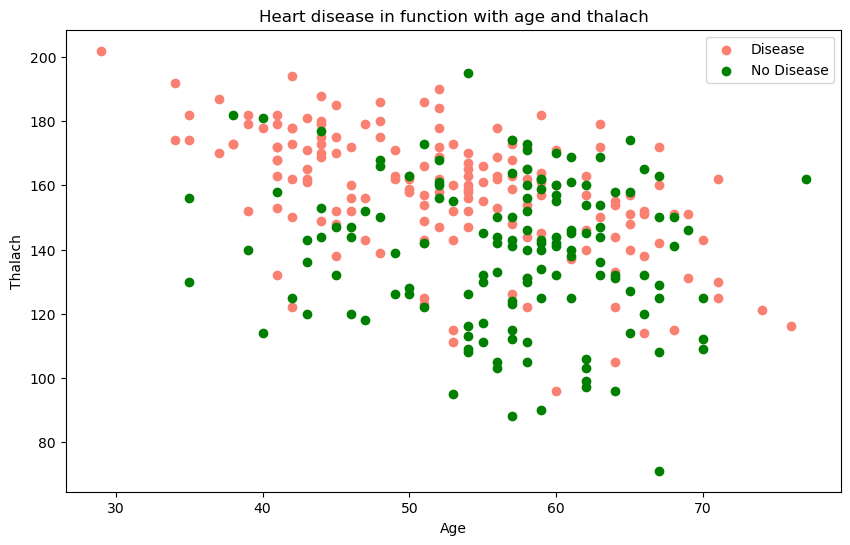

In [16]:
#create a figure
plt.figure(figsize=(10,6))
#scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],color="salmon")
#scatter with negetive examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],color="green");
#add some info
plt.title("Heart disease in function with age and thalach")
plt.xlabel("Age")
plt.ylabel("Thalach")
plt.legend(["Disease","No Disease"]);

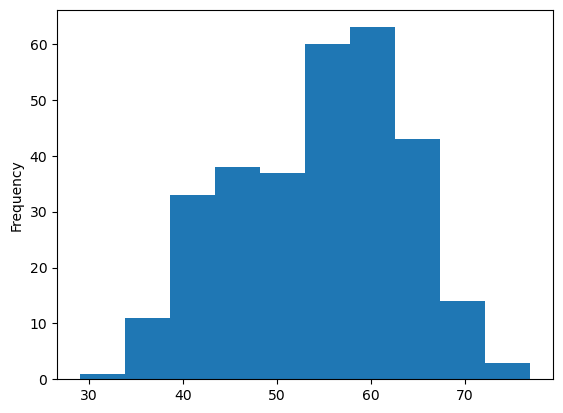

In [17]:
#check the distribution of the age column
df.age.plot.hist();

### Heart disease frequency per ca type

In [18]:
pd.crosstab(df.ca,df.target)

target,0,1
ca,,
0,45,130
1,44,21
2,31,7
3,17,3
4,1,4


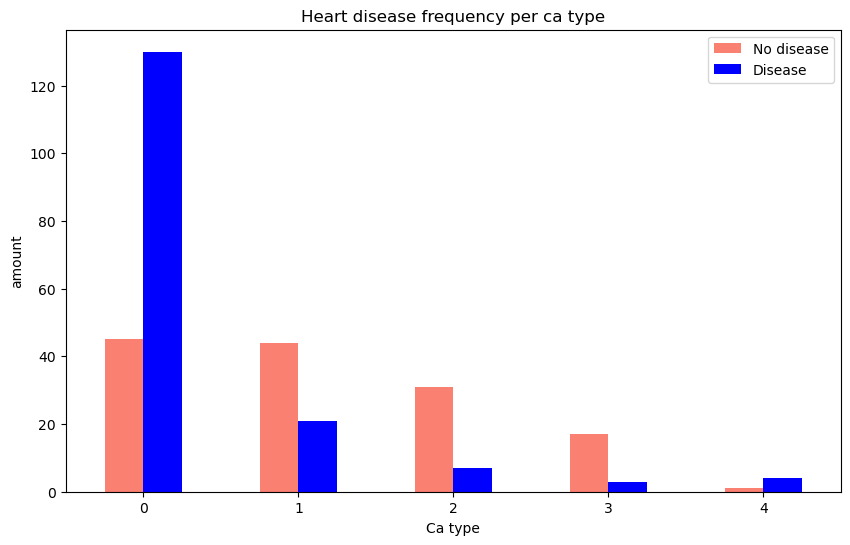

In [19]:
# make the crosstab more visual
pd.crosstab(df.ca,df.target).plot(kind="bar",figsize=(10,6),color=["salmon","blue"])
#add some communication
plt.title("Heart disease frequency per ca type")
plt.xlabel("Ca type")
plt.ylabel("amount")
plt.legend(["No disease","Disease"])
plt.xticks(rotation=0);

In [20]:
# make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


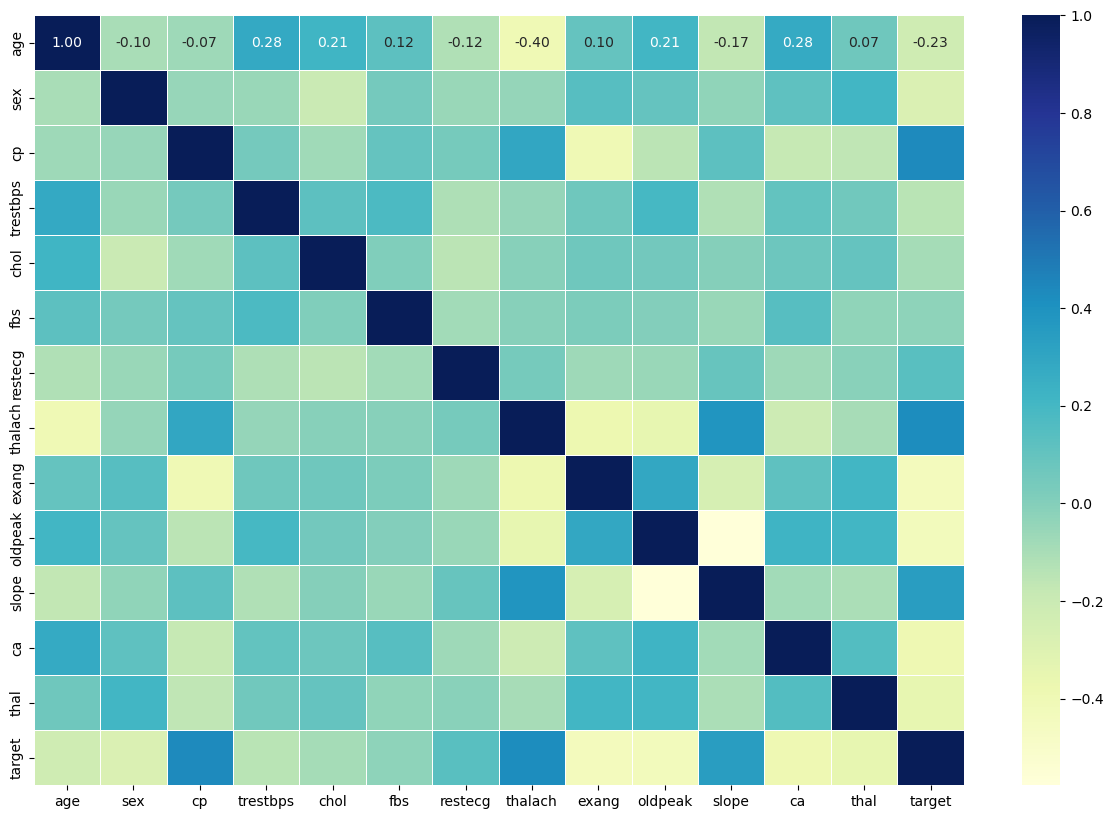

In [21]:
# lets make correlation matrix more visible
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(data=corr_matrix,linewidths=0.5,fmt=".2f",annot=True,cmap="YlGnBu");

# 5.modelling

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
#split data into x and y
X=df.drop("target",axis=1)
Y=df["target"]

In [24]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [25]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [26]:
# split data into train and test sets
np.random.seed(42)
#split into train and test set
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)


In [27]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [28]:
Y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

Now we've got the data into train and test sets,its time to build a ml model
we'll train it(find patterns on train set).
and test it (to find patterns) on test set

we are going to try 3 different ml models

1. Logistic regression
2. K nearest neighbours
3. Random forest classifier

In [29]:
# put models in a dictionary
models={"Logistic Regression":LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "Random Forest":RandomForestClassifier()}
# create a function to fit and score data
def fit_and_score(models,X_train,X_test,Y_train,Y_test):
    """
    Fits and evaluate given ml models
    models:a dict of different sk learn ml models
    X_train:training data(no labels)
    X_test:testing data(no labels)
    Y_train:training labels
    Y_test:testing labels
    """
    #set random seeds
    np.random.seed(42)
    #make a dictionary to keep model scores
    model_scores={}
    #loop through models
    for name, model in models.items():
        #fit the model to the data
        model.fit(X_train,Y_train)
        #evaluate the model and append its score to model_Scores
        model_scores[name]=model.score(X_test,Y_test)
    return model_scores

In [30]:
model_scores=fit_and_score(models=models,X_train=X_train,X_test=X_test,Y_train=Y_train,Y_test=Y_test)
model_scores

C:\Users\dell\Desktop\ML\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### model comparison

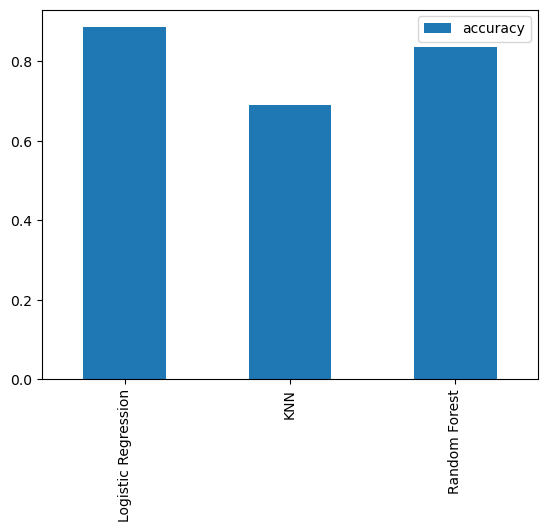

In [31]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

now we got a baseline model and we know models first predictions arent always what we should based our next steps off what should we do?


lets look at the following:
* hyperparameter tuning
* feature importance
* confusion matrix
* cross-validation
* precision
* recall
* F1 score
* classification report
* ROC curve
* area under the curve

### Hyperparameter tuning(by hand)

In [32]:
# lets tune KNN
train_scores=[]
test_scores=[]
#create a list of different values for n_neighbours
neighbors=range(1,21)
#setup KNN instance
knn=KNeighborsClassifier()
#Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    #fit the algo
    knn.fit(X_train,Y_train)
    #update the trainig scores list
    train_scores.append(knn.score(X_train,Y_train))
    #update the test score list
    test_scores.append(knn.score(X_test,Y_test))

In [33]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [34]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data:75.41%


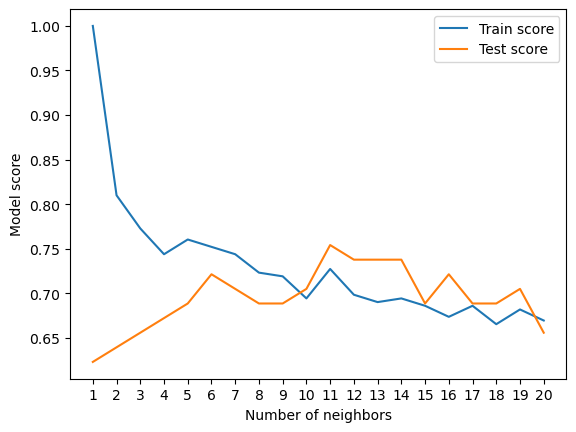

In [35]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
print(f"Maximum KNN score on the test data:{max(test_scores)*100:.2f}%")

### hyperparameter tuning with randomizedsearchcv
we are going to tune:
* LogisticRegression()
* RandomForestClassifier()

.. using RandomizedSearchCV

In [36]:
#create a hyperparameter grid for logisticregression
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}


In [37]:
np.logspace(-4,4,20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [38]:
#create a hyperparametr grid for randomforestclassifier
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,10,2),
        "min_samples_leaf":np.arange(1,20,2)}

now we have got hyperparameter grids setup for each of our models,
lets tune them using randomizedsearchcv

In [39]:
#tune logisticregression
np.random.seed(42)
#setup random hyperparameters search for LogisticRegression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)
#fit random hyperparameters seacrh model for logisticregression
rs_log_reg.fit(X_train,Y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [40]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [41]:
rs_log_reg.score(X_test,Y_test)

0.8852459016393442

lets tune randomforestclassier

In [42]:
#tune randomforestclassifier
np.random.seed(42)
#setup random hyperparameters search for LogisticRegression
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                             param_distributions=rf_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)
#fit random hyperparameters seacrh model for logisticregression
rs_rf.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [43]:
#find best hyperparameters
rs_rf.best_params_

{'n_estimators': 110,
 'min_samples_split': 6,
 'min_samples_leaf': 17,
 'max_depth': 3}

In [44]:
#evaluate  the randomized search randomforestclassifier model
rs_rf.score(X_test,Y_test)

0.8852459016393442

In [45]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

1. by hand
2. RandomizedSearchCV
3. GridSeachCV

### hyperparameters tuning with gridsearchcv

since our logisticregression provides the best scores so far, we will try and improve them using GridSearchCV

In [46]:
# different hyperparameters for our logisticregression model
log_reg_grid={"C":np.logspace(-4,4,30),
             "solver":["liblinear"]}
#setup grid hyperparameter search for logisticregression
gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)
#fit grid hyperparameter search model
gs_log_reg.fit(X_train,Y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [47]:
#check the best hyperparameters
gs_log_reg.score(X_test,Y_test)

0.8852459016393442

### evaluating our tuned ml classifier, beyond accuracy
* ROC and AUC
* confusion matrix
* classification report
* precision
* recall
* f1 score

  ... and it would be great if cv was used where possible

  To evaluate comparisons and evaluate our trained model, first we need to make preditions.

In [48]:
# make predictions with tuned model
y_preds=gs_log_reg.predict(X_test)

In [49]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [50]:
Y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

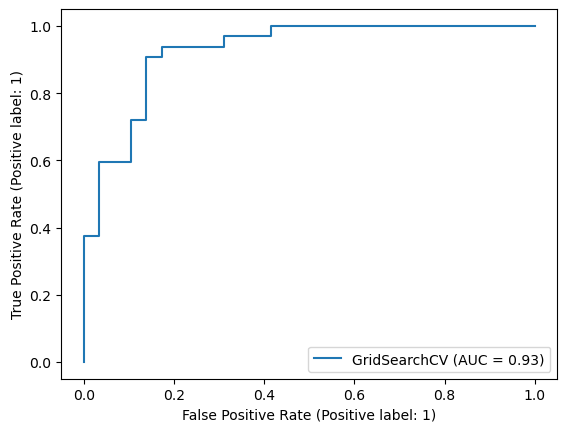

In [51]:
# plot ROC curve and calculate AUC metric
fpr,tpr,thresholds=roc_curve(y_preds,Y_test)
roc_auc=auc(fpr,tpr)
RocCurveDisplay.from_estimator(estimator=gs_log_reg, 
                               X=X_test, 
                               y=Y_test);

In [52]:
#confusion matrix
print(confusion_matrix(Y_test,y_preds))

[[25  4]
 [ 3 29]]


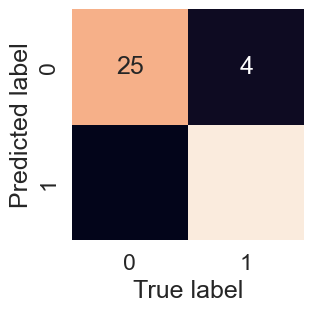

In [53]:
sns.set(font_scale=1.5)
def plot_conf_mat(Y_test,y_preds):
    """
    plots a nice looking confusion matrix using seaborn's heatmap
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(Y_test,y_preds),
                   annot=True,
                  cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    bottom=ax.get_ylim()
    ax.set_ylim(bottom)
plot_conf_mat(Y_test,y_preds)

now we got a roc curve auc metric and confusion matrix lets get a classification report
as well as cv precision,recall and f1 score

In [54]:
print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### calculate evaluation matrix using cv

we are going to calculate accuracy,precision,recall and f1 score using cross_val_score()

In [55]:
# check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [56]:
#create a new classifier with best parameters
clf= LogisticRegression(C=0.20433597178569418, solver="liblinear")

In [57]:
#cross validated accuracy
cv_acc=cross_val_score(clf,X,Y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [58]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [59]:
#cross-validated precision
cv_pre=cross_val_score(clf,X,Y,cv=5,scoring="precision")
cv_pre=np.mean(cv_pre)
cv_pre

0.8207936507936507

In [60]:
#cross-validated precision 
cv_recall=cross_val_score(clf,X,Y,cv=5,scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [61]:
#cross validated f1 score
cv_f1=cross_val_score(clf,X,Y,cv=5,scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

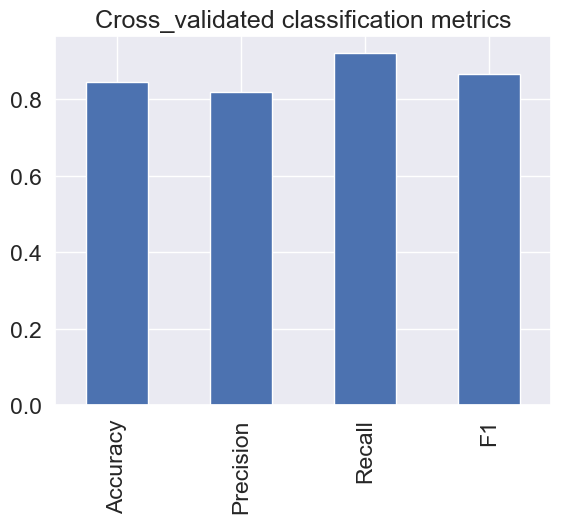

In [62]:
#visualize cv metrics
cv_metrics =pd.DataFrame({"Accuracy": cv_acc,
                         "Precision":cv_pre,
                         "Recall": cv_recall,
                         "F1": cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross_validated classification metrics",
                     legend=False);

### feature importance
feature importance is another as asking which features contributed most to the outcome of th emodel

In [63]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


finding feature importance is different for each ml model. one way to find feature importance is to search for "model name feature importance"

In [64]:
#fit an instance of logictic reg
gs_log_reg.best_params_


{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [65]:
clf=LogisticRegression(C=0.20433597178569418,solver="liblinear")
clf.fit(X_train,Y_train);

In [66]:
#check coef_
clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [67]:
#match coef's of features to columns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

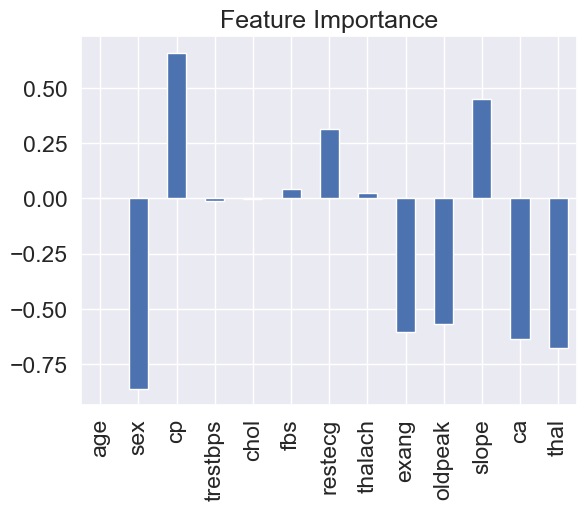

In [68]:
#visaualize feature importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);

In [69]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [70]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
